## 1. 머신 러닝(50점)
데이터 : 당뇨병 유무와 신체검사 데이터

In [3]:
import pandas as pd
raw_df = pd.read_csv('../data/diabetes_for_test.csv')
raw_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
### 1.1 데이터 탐색

In [5]:
# 1-1-1. 시각화 포함 탐색적 자료분석을 시행하시오. (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'Outcome'

df = raw_df.copy()

In [10]:
# General Analysis

In [13]:
'''
모두 수치형 데이터이며, 결측치는 없는것으로 보인다.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
'''
모두 수치형 데이터이지만, scale은 0.4 부터 120까지 다양하게 존재한다.
-> 이후 모델 학습을 위해 scaling이 필요해 보인다.
'''
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


In [15]:
# Target col analysis
'''
target 데이터는 number로 보이지만, 실제로는 category 데이터이다.
binary한 classification 문제로 보인다.
'''
df[target_col].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [20]:
# Feature col analysis
feature_cols = df.drop(columns=[target_col]).columns

<Axes: >

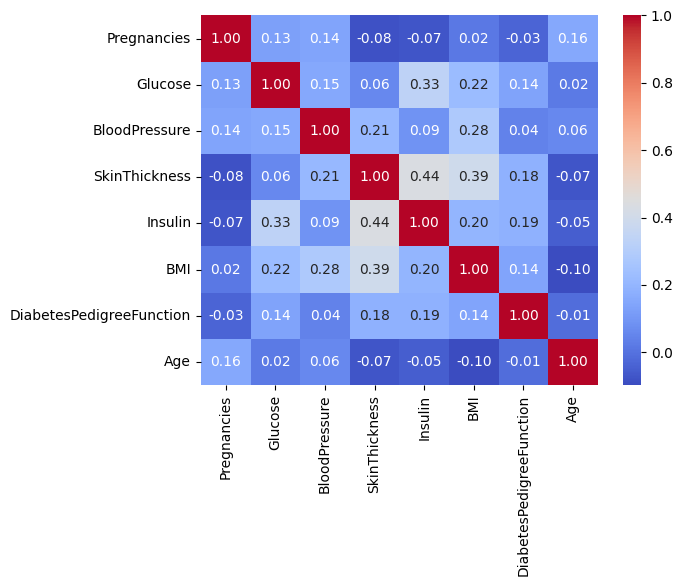

In [21]:
'''
강한 양의 상관관계나 음의 상관관계를 보이는 feature는 없어보인다.
'''
sns.heatmap(df.loc[:, feature_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')

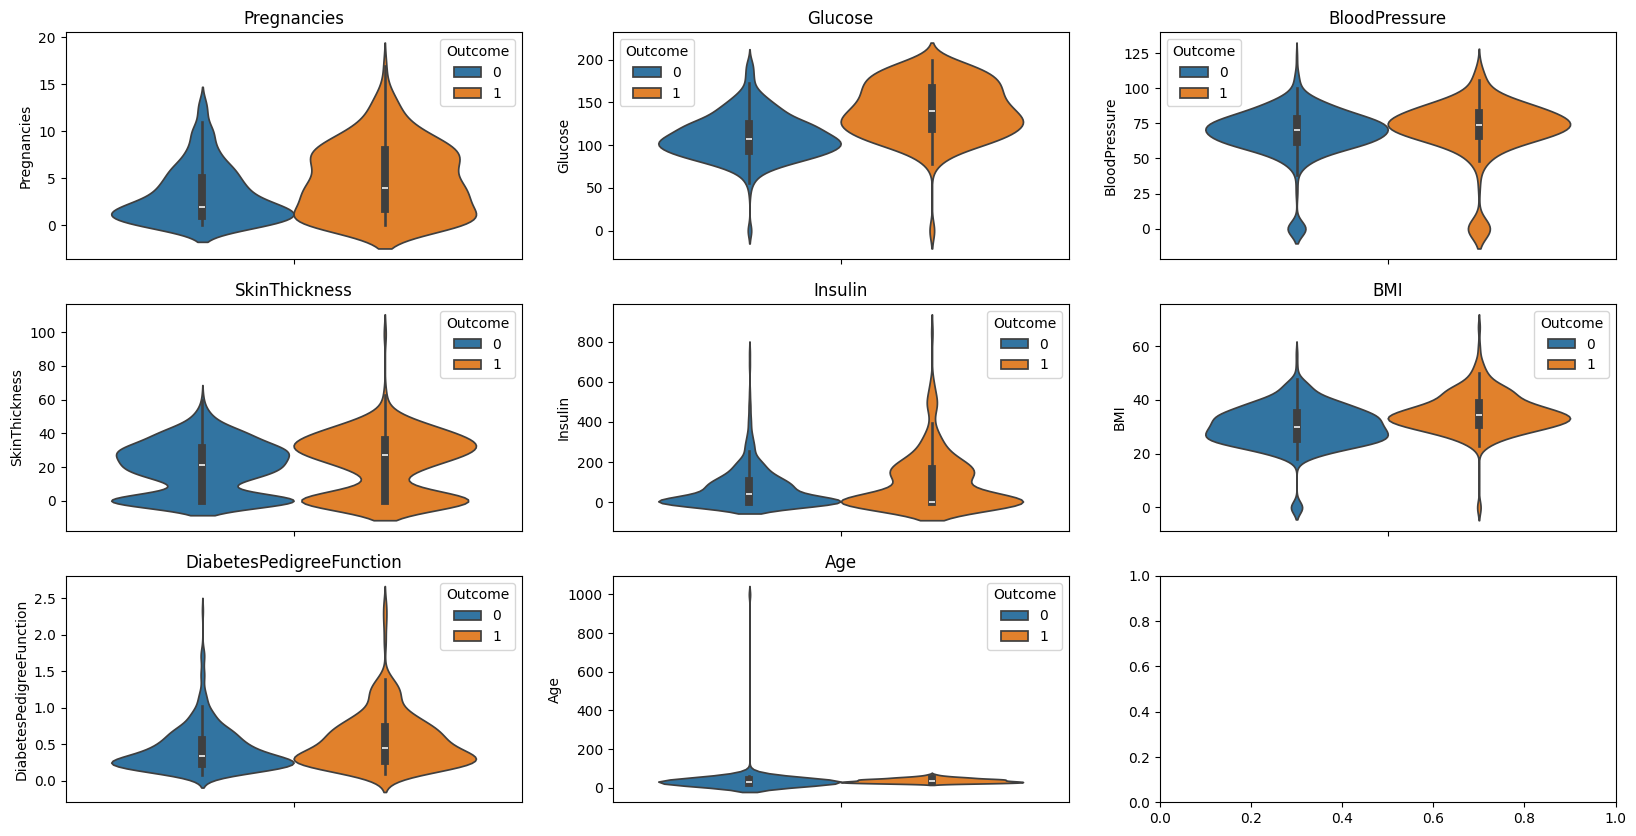

In [ ]:
'''
Glucose, Bloodpressure, BMI, Age 에서 이상치라고 생각해 볼 수 있는 값들이 존재한다.
'''
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()
for idx,feature_col in enumerate(feature_cols):
    sns.violinplot(hue=target_col, y=feature_col, data=df,ax=axes[idx])
    axes[idx].set_title(feature_col)
plt.show()


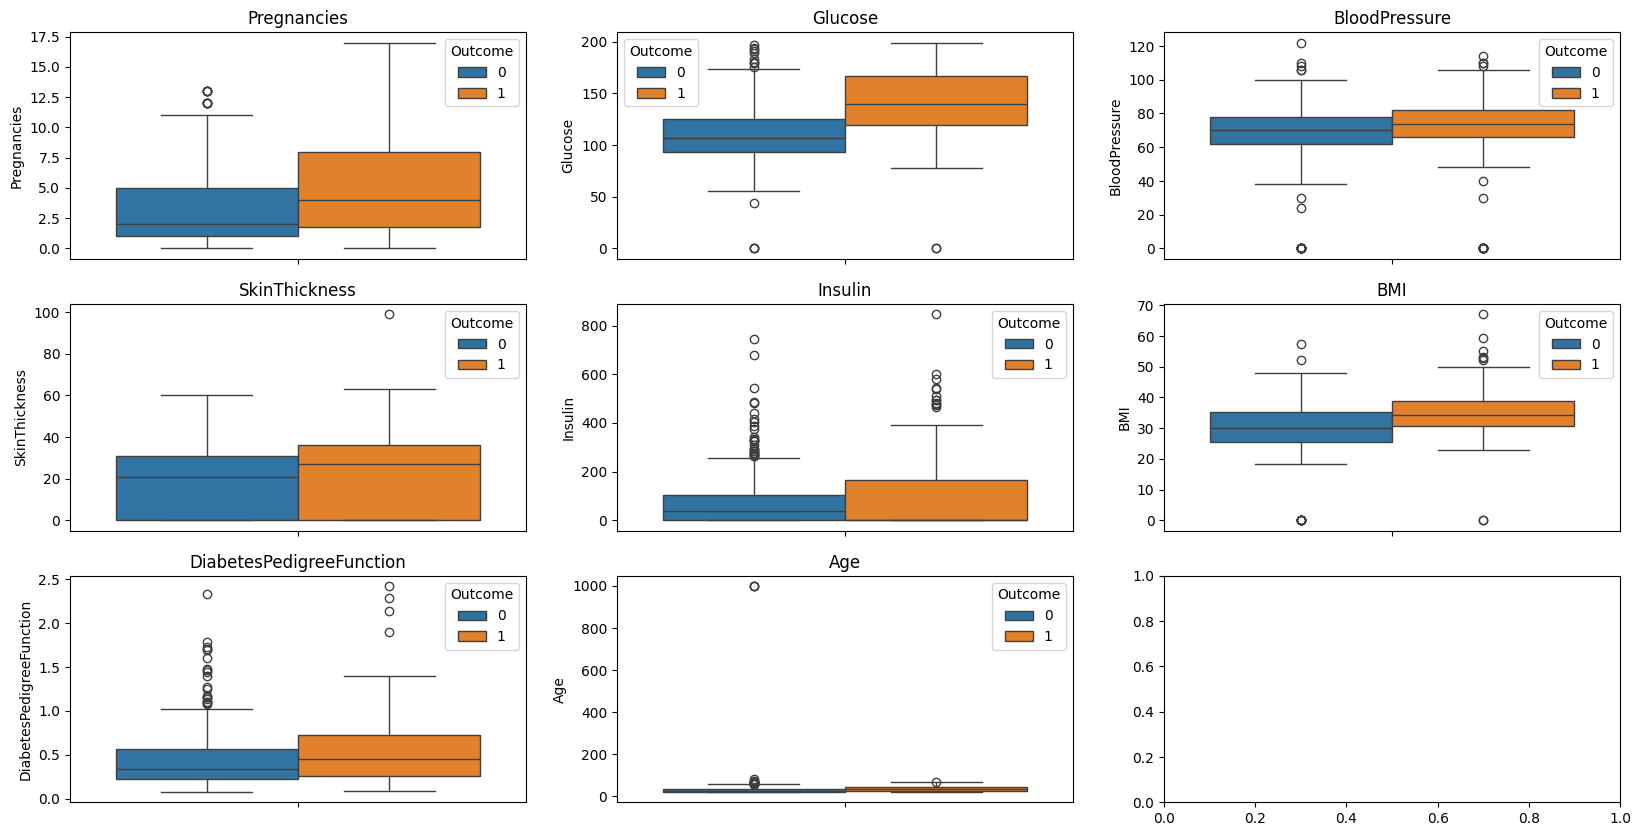

In [35]:
'''
Glucose, Bloodpressure, BMI, Age 에서 이상치라고 생각해 볼 수 있는 값들이 존재한다.
'''
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()
for idx,feature_col in enumerate(feature_cols):
    sns.boxplot(hue=target_col, y=feature_col, data=df,ax=axes[idx])
    axes[idx].set_title(feature_col)
plt.show()


In [ ]:
# 1-1-2. 이상치를 식별하고 처리하시오

In [43]:
'''
이상치로 파악되는 row들을 살펴보면 
row 별로 하나의 feature가 이상치인 경우보다, row 전체가 하나 이상의 이상치를 가지고 있는 경우가 많다.
따라서 이 경우에는 이상치를 가지고 있는 row를 제거하는 것이 좋아보인다.
'''
outliers = (df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['BMI'] == 0) | (df['Age'] > 200)
# df[outliers]

df = df[~outliers]

In [ ]:
# 1-1-3. 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.
'''
현재 가진 도메인 지식과 boxplot을 바탕으로 이상치를 제거하였다.
하지만, 도메인 지식이 충분하고 데이터에 대한 이해가 부족한 상태에서 이상치를 제거하는 것은 위험할 수 있다.

1. 이상치 제거가 옳은 판단이었는지 데이터 구축자와 상의해야한다.
2. feature별로 scale이 다르기에 모델 학습전 scaling이 필요하다.
3. target 데이터의 불균형이 존재하기 때문에 이를 적절한 샘플링 기법을 통해 처리하는 것이 유리할 수 있다.
'''

In [44]:
### 1.2 클래스 불균형을 처리

In [45]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
# 1-2-1. 업 샘플링 과정을 설명하고 결과를 작성하시오.
'''
업 샘플링 <-> 오버 샘플링은 데이터의 불균형을 해소하기 위한 방법 중 하나이다.

업 샘플링은 적은 클래스의 데이터를 증가시키는 방법이다.
    RandomOverSampler : 적은 클래스의 데이터를 복사하여 증가시키는 방법
    SMOTE : 적은 클래스의 데이터를 복사하는 것이 아닌, 새로운 데이터를 합성하는 방법
'''

In [50]:
from imblearn.over_sampling import RandomOverSampler

# RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)
X_resampled_ros.shape, y_resampled_ros.shape

((946, 8), (946,))

In [51]:
from imblearn.over_sampling import SMOTE
# SMOTE
smote = SMOTE(random_state=0)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
X_resampled_smote.shape, y_resampled_smote.shape

((946, 8), (946,))

In [ ]:
# 1-2-2. 언더 샘플링 과정을 설명하고 결과를 작성하시오.
'''
언더 샘플링 : 많은 클래스의 데이터를 줄이는 방법
    RandomUnderSampler : 많은 클래스의 데이터를 랜덤하게 제거하는 방법
    NearMiss : 많은 클래스의 데이터와 가까운 데이터를 제거하는 방법
'''

In [53]:
from imblearn.under_sampling import RandomUnderSampler

# RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)
X_resampled_rus.shape, y_resampled_rus.shape

((498, 8), (498,))

In [54]:
from imblearn.under_sampling import NearMiss
# NearMiss
nm = NearMiss()
X_resampled_nm, y_resampled_nm = nm.fit_resample(X, y)
X_resampled_nm.shape, y_resampled_nm.shape

((498, 8), (498,))

In [56]:
len(raw_df),len(df)

(768, 722)

In [57]:
# 1-2-3. 둘 중 하나를 선택하고 선택한 이유를 서술하시오.
'''
원시 데이터의 크기가 768이며, outlier를 제거한 후 크기는 722이다.

여기서 언더 샘플링을 진행할 경우 데이터는 498까지 줄어든다. 이는 이후 모델을 구축하는데 활용하기에는 적은 양의 데이터라고 판단된다.
이에 이번 경우에는 오버 샘플링을 진행한다.

또한 이번 경우에는 오버 샘플링 기법으로 SMOTE를 선택하였다. SMOTE는 새로운 데이터를 합성하는 방법으로, 데이터의 양을 늘리면서도 데이터의 다양성을 유지할 수 있다.
'''
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=0)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
df = pd.concat([X_resampled_smote, y_resampled_smote], axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
941,5,124,72,0,0,27.756532,0.373595,28,1
942,1,167,73,16,144,23.658409,0.443473,33,1
943,1,183,66,27,187,34.917348,0.356430,37,1
944,3,171,69,22,176,28.760667,0.494613,46,1


In [ ]:
### 1.3. 모델링

In [96]:
# 1-3-1. 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오.
'''
본 문제는 binary classification 문제이다.
3가지 알고리즘으로는
    1. Logistic Regression
    2. Random Forest
    3. KNeighborsClassifier
를 선택한다.

'''

'\n본 문제는 binary classification 문제이다.\n3가지 알고리즘으로는\n    1. Logistic Regression\n    2. Random Forest\n    3. KNeighborsClassifier\n를 선택한다.\n\n'

In [97]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
model_results = dict()

In [99]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

time_start = time.time()
model.fit(X_train_scaled, y_train)
model_fit_time = time.time() - time_start

time_start = time.time()
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
model_predict_time = time.time() - time_start


train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

model_results['LogisticRegression'] = {
    'time': model_fit_time + model_predict_time,
    'fit_time': model_fit_time,
    'predict_time': model_predict_time,
    'train_accuracy': train_accuracy,
    'train_f1_score': train_f1_score,
    'test_accuracy': test_accuracy,
    'test_f1_score': test_f1_score
}

In [100]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

time_start = time.time()
model.fit(X_train_scaled, y_train)
model_fit_time = time.time() - time_start

time_start = time.time()
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
model_predict_time = time.time() - time_start


train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

model_results['RandomForestClassifier'] = {
    'time': model_fit_time + model_predict_time,
    'fit_time': model_fit_time,
    'predict_time': model_predict_time,
    'train_accuracy': train_accuracy,
    'train_f1_score': train_f1_score,
    'test_accuracy': test_accuracy,
    'test_f1_score': test_f1_score
}

In [101]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

time_start = time.time()
model.fit(X_train_scaled, y_train)
model_fit_time = time.time() - time_start

time_start = time.time()
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
model_predict_time = time.time() - time_start


train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

model_results['KNeighborsClassifier'] = {
    'time': model_fit_time + model_predict_time,
    'fit_time': model_fit_time,
    'predict_time': model_predict_time,
    'train_accuracy': train_accuracy,
    'train_f1_score': train_f1_score,
    'test_accuracy': test_accuracy,
    'test_f1_score': test_f1_score
}

In [102]:
# 1-3-2. 모델을 비교하고 결과를 설명하시오.
'''
속도 측면에서는 LogisticRegression이 가장 빠르다.
정확도 측면에서는 RandomForestClassifier가 가장 높다.
    추가적으로 RandomForestClassifier의 경우에는 train-set에 대한 정확도가 1.0으로 과적합의 가능성이 있다.
    따라서, RandomForestClassifier의 경우에는 hyperparameter tuning이 필요해 보인다.
    
따라서, 속도 측면에서는 LogisticRegression을 선택하고, 정확도 측면에서는 RandomForestClassifier를 선택한다.
'''
model_result_df = pd.DataFrame.from_dict(model_results, orient='index')
model_result_df.round(3)

,time,fit_time,predict_time,train_accuracy,train_f1_score,test_accuracy,test_f1_score
LogisticRegression,0.003,0.003,0.000,0.775,0.766,0.689,0.678
RandomForestClassifier,0.125,0.117,0.008,1.000,1.000,0.800,0.808
KNeighborsClassifier,0.016,0.001,0.015,0.849,0.855,0.747,0.760


In [103]:
# 1-3-3. 속도 개선을 위한 차원 축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오.
'''
feature의 수에 따라서 model의 학습속도가 달라질 수 있다.
차원 축소에는 여러가지 방법이 있는데, 그 중 PCA를 사용해본다.

-> 데이터가 크지 않기때문에 기본적으로 모델의 학습 시간이 길지 않다.
-> 하지만 차원축소를 진행한 겨웅에 모델의 학습 시간이 감소하는 것은 확인할 수 있었다.
-> 또한 차원축소로 인한 데이터 손실로 인한 정확도 감소는 없었다.
'''

'\nfeature의 수에 따라서 model의 학습속도가 달라질 수 있다.\n차원 축소에는 여러가지 방법이 있는데, 그 중 PCA를 사용해본다.\n'

In [104]:
'''
pca로 확인해본 결과 총 80% 이상의 variance를 설명할 수 있는 feature의 수는 5개이다.
따라서, 5개의 feature로 pca를 진행한다.
'''
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_train_scaled)
print(np.cumsum(pca.explained_variance_ratio_))

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

[0.25487914 0.4814318  0.60887805 0.72215247 0.82728752 0.89955291
 0.95144551 1.        ]


In [105]:
model_results = dict()
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

time_start = time.time()
model.fit(X_train_scaled_pca, y_train)
model_fit_time = time.time() - time_start

time_start = time.time()
y_train_pred = model.predict(X_train_scaled_pca)
y_test_pred = model.predict(X_test_scaled_pca)
model_predict_time = time.time() - time_start


train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

model_results['LogisticRegression'] = {
    'time': model_fit_time + model_predict_time,
    'fit_time': model_fit_time,
    'predict_time': model_predict_time,
    'train_accuracy': train_accuracy,
    'train_f1_score': train_f1_score,
    'test_accuracy': test_accuracy,
    'test_f1_score': test_f1_score
}
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

time_start = time.time()
model.fit(X_train_scaled_pca, y_train)
model_fit_time = time.time() - time_start

time_start = time.time()
y_train_pred = model.predict(X_train_scaled_pca)
y_test_pred = model.predict(X_test_scaled_pca)
model_predict_time = time.time() - time_start


train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

model_results['RandomForestClassifier'] = {
    'time': model_fit_time + model_predict_time,
    'fit_time': model_fit_time,
    'predict_time': model_predict_time,
    'train_accuracy': train_accuracy,
    'train_f1_score': train_f1_score,
    'test_accuracy': test_accuracy,
    'test_f1_score': test_f1_score
}
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

time_start = time.time()
model.fit(X_train_scaled_pca, y_train)
model_fit_time = time.time() - time_start

time_start = time.time()
y_train_pred = model.predict(X_train_scaled_pca)
y_test_pred = model.predict(X_test_scaled_pca)
model_predict_time = time.time() - time_start


train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

model_results['KNeighborsClassifier'] = {
    'time': model_fit_time + model_predict_time,
    'fit_time': model_fit_time,
    'predict_time': model_predict_time,
    'train_accuracy': train_accuracy,
    'train_f1_score': train_f1_score,
    'test_accuracy': test_accuracy,
    'test_f1_score': test_f1_score
}

In [107]:
model_result_df = pd.DataFrame.from_dict(model_results, orient='index')
model_result_df.round(3)

,time,fit_time,predict_time,train_accuracy,train_f1_score,test_accuracy,test_f1_score
LogisticRegression,0.002,0.002,0.000,0.775,0.766,0.689,0.678
RandomForestClassifier,0.105,0.096,0.009,1.000,1.000,0.768,0.780
KNeighborsClassifier,0.014,0.000,0.014,0.849,0.855,0.747,0.760


## 2. 통계분석 

In [108]:
# 2-1
# 회사는 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다.
# 회사에서는 품질경영팀으로부터 제조사별로 금속함유량이 차이가 난다고 제보를 받았다. 
# 해당 금속함유량 데이터에 대한 검정을 수행하시오. (유의확률:0.05)

In [110]:
import pandas as pd
raw_df = pd.read_csv('../data/metalicity')
raw_df.head()

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529


In [ ]:
# 2-1-1. 연구가설과 귀무가설을 작성하시오
H0 = '제품에 금속 재질 함유량의 분산이 1.3을 넘지 않는다.'
H1 = '제품에 금속 재질 함유량의 분산이 1.3을 넘는다.'

In [119]:
from scipy import stats
import numpy as np

H0 = '제품에 금속 재질 함유량의 분산이 1.3이다.'
H1 = '제품에 금속 재질 함유량의 분산이 1.3이 아니다.'

alpha = 0.05
pop_var = 1.3

sample_var = np.var(raw_df['metalicity'], ddof=1)
n = len(raw_df['metalicity'])

# 검정통계량
statistic = (n - 1) * sample_var / pop_var

# 양측 임계값
lower_critical = stats.chi2.ppf(alpha / 2, n - 1)
upper_critical = stats.chi2.ppf(1 - alpha / 2, n - 1)

# p-value
p_value = 2 * min(
    stats.chi2.cdf(statistic, n - 1),
    1 - stats.chi2.cdf(statistic, n - 1)
)

print('검정통계량: {:.2f}'.format(statistic))
print('임계값: [{:.2f}, {:.2f}]'.format(lower_critical, upper_critical))
print('p-value: {:.4f}'.format(p_value))

if statistic < lower_critical or statistic > upper_critical:
    print('기각:', H1)
else:
    print('채택:', H0)

검정통계량: 85.18
임계값: [117.10, 184.69]
p-value: 0.0000
기각: 제품에 금속 재질 함유량의 분산이 1.3이 아니다.


In [114]:
# 2-1-3. 검정통계량을 보이고 가설 채택 하시오
# 검정통계량
statistic = (n - 1) * sample_var / pop_var

# 임계값
critical_value = stats.chi2.ppf(1 - alpha, n - 1)

# p-value
p_value = 1 - stats.chi2.cdf(statistic, n - 1)

print('검정통계량: {:.2f}'.format(statistic))
print('임계값: {:.2f}'.format(critical_value))
print('p-value: {:.4f}'.format(p_value))

if statistic > critical_value:
    print(H1)
else:
    print(H0)

검정통계량: 85.18
임계값: 178.49
p-value: 1.0000
제품에 금속 재질 함유량의 분산이 1.3이다.


In [129]:
# 2-2 
# 200개의 Lot별 불량 제품 수량 데이터에 대해 p 관리도를 구하고 시각화 하시오.

In [135]:
import pandas as pd
raw_df = pd.read_csv('../data/lot_quality.csv')

In [137]:
df = raw_df.copy()

In [138]:
# 2-2-1. p관리도에 따라 관리중심선(center line), 관리 상한선, 하한선 구하시오
df['p'] = df['불량수량'] / df['생산수량']
df['ulp'] = df['p'] + (3 * (df['p'] * (1 - df['p'])) / df['생산수량']) ** 0.5
df['llp'] = df['p'] - (3 * (df['p'] * (1 - df['p'])) / df['생산수량']) ** 0.5
df['cl'] = df['p'].mean()

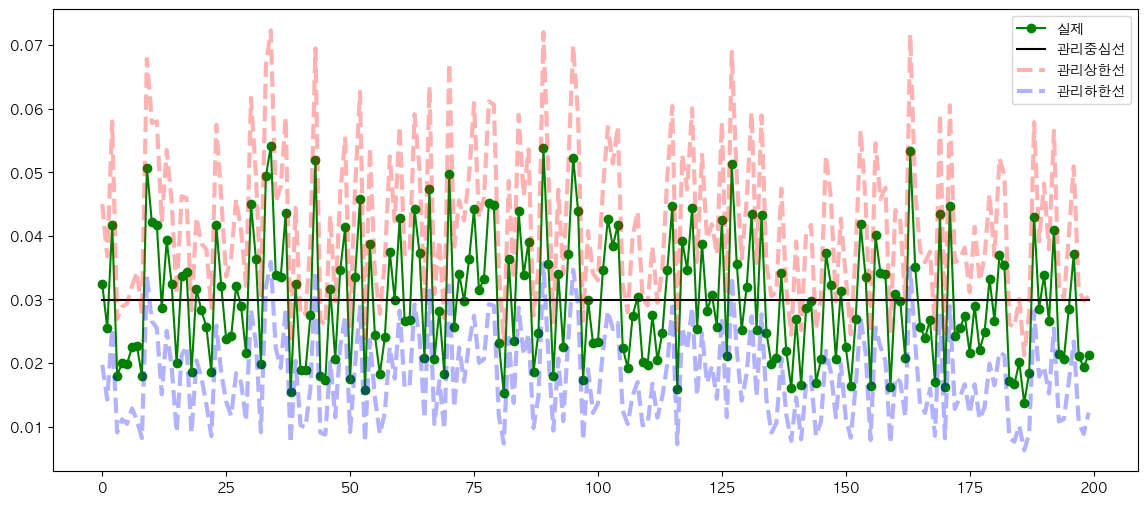

In [139]:
# 2-2-2 관리도를 시각화 하시오
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(14, 6))
plt.plot(df['p'], label='실제', color='g', marker='o')
plt.plot(df['cl'], label='관리중심선', color='k')
plt.plot(df['ulp'], label='관리상한선', alpha=0.3, color='r', linewidth=3, linestyle='--')
plt.plot(df['llp'], label='관리하한선', alpha=0.3, color='b', linewidth=3, linestyle='--')
plt.legend()
plt.show()

In [ ]:
# 2-3
# 제품 1, 2를 만드는데 재료 a, b, c가 일부 사용되며, 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다.
# 재료는 한정적으로 주어지는데, 이때 최대 수익을 낼 수 있을 때의 제품 1과 제품2의 개수를 구하라.
# 재료 공급량 { a: 1300, b: 1000, c:1200 }
import pandas as pd
df = pd.DataFrame(
    [[20, 20, 20],
     [40, 30, 30]],
    index=['제품_1', '제품_2'],
    columns=['재료_a', '재료_b', '재료_c']
)
df

In [121]:
# 2-4
# 4.상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 함. ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']<br>
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']

In [125]:
# 2-4-1. 구매하는 패턴으로 봐서 두 상품이 연관이 있는지 가설 세우고 검정하시오
H0 = '두 상품은 연관이 없다.'
H1 = '두 상품은 연관이 있다.'
from statsmodels.sandbox.stats.runs import runstest_1samp

observed = [int(i=='a') for i in data]
statistics, p_value = runstest_1samp(observed)
statistics, p_value

(-1.1144881152070183, 0.26506984027306035)

In [126]:
# 2-4-2. 연구가설 귀무가설 세우시오

In [127]:
# 2-4-3. 가설 채택하시오
if p_value < .05:
    print('H1 : 연속적인 관측값이 임의적이지 않다. (연관성이 있다.)')
else:

    print('H0 : 연속적인 관측값이 임의적이다. (연관성이 없다.)')

H0 : 연속적인 관측값이 임의적이다. (연관성이 없다.)
